# 1 Problema do Mix de Produção

## 1.1 Modelo genérico


### Índices:

$i = 1,..,m$

$j = 1,...,n$


### Parâmetros do modelo

$a_{ij} = \text{Quantidade de horas necessárias para a realização da atividade } i \text{ na fabricação do produto } j$

$b_i = \text{Quantidade de horas disponíveis para realização da atividade } i$

$c_j = \text{Lucro líquido por unidade do produto } j \text{ produzido}$ 


### Variáveis de decisão

$x_j = \text{quantidade a ser fabricada do produto } j \text{ por semana}$


### Função objetivo

$\text{max }z = \sum\limits_{j=1}^{n} c_j x_{j}$

### Sujeito a:

$\sum\limits_{j=1}^{n} a_{ij} x_{j} \leq b_{i}, \forall \; i$

$x_{j} \geq 0$

## 1.2 Aplicação didática

[Belfiore e Fávero, 2013] A empresa Venix de brinquedos está revendo seu planejamento de produção de carrinhos e triciclos. O lucro líquido por unidade de carrinho e triciclo produzido é de $\text{R\$ } 12,00$ e $\text{R\$ } 60,00$, respectivamente. As matérias-primas e os insumos necessários para a fabricação de cada um dos produtos são terceirizados, cabendo à empresa os processos de usinagem, pintura e montagem. O processo de usinagem requer 15 minutos de mão de obra especializada por unidade de carrinho e 30 minutos por unidade de triciclo produzida. O processo de pintura requer 6 minutos de mão de obra especializada por unidade de carrinho e 45 minutos por unidade de triciclo produzida. Já o processo de montagem necessita de 6 minutos e 24 minutos para uma unidade de carrinho e de triciclo produzida, respectivamente. O tempo disponível por semana é de 36, 22 e 15 horas para os processos de usinagem, pintura e montagem, respectivamente. A empresa quer determinar quanto produzir de cada produto por semana, respeitando as limitações de recursos, de forma a maximizar o lucro líquido semanal. Formular o problema de programação linear que maximiza o lucro líquido da empresa Venix.

### Código para gerar a visualização

In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [2]:
# Funções auxiliares:

# Passa como parâmetro um valor (z) e o gradiente da função objetivo
# Retorna as coordenadas de origem e destino de uma curva de nível
def get_coords_curva_nivel(z, gradiente):
    x = 0.0
    y = z/gradiente[1]
    x0 = z/gradiente[0]
    y0 = 0.0
    return x, y, x0, y0

# Passa as coordenadas de origem e destino de uma reta
# Retorna os coeficientes angular e linear:
def get_coefs_reta(x_fim, y_fim, x_ini=0, y_ini=0):
    y_aux = y_fim - y_ini
    x_aux = x_fim - x_ini
    a = y_aux/x_aux
    b = y_fim - a*x_fim
    return a, b


# Plota o gráfico exibindo a região factível, o gradiente e as curvas de nível:
def plotar(A, b, c, sense, max_x=150, max_y=40, z_max=5000, z_step=204):
    grad = (c[0], c[1])

    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
            '#bcbd22', '#17becf']

    # Vetor de valores para a variável x1:
    x1 = np.linspace(0, max_x, 2000)

    # Restrições transformadas em igualdade:
    lst_constr = []
    for i in range(len(A)):
        y = (b[i] - A[i][0]*x1) / A[i][1]
        lst_constr.append(y)

    # Variável auxiliar para o gráfico
    dict_lim={
        '<=': 1000, 
        '=': 0, 
        '>=': 0}
    
    # Plota as restrições:
    dict_sense={
        '<=': r'\leq', 
        '=': r'\eq', 
        '>=': r'\geq'}
    for i in range(len(A)):
        lbl_constr = str(A[i][0]) + 'x_1 + ' + str(A[i][1]) + 'x_2 ' + dict_sense[sense[i]] + ' '+ str(b[i])
        plt.plot(x1, lst_constr[i], label=r'$' + lbl_constr + '$', color=colors[i]) # reta
        y_inf = x1*0 + dict_lim[sense[i]]
        plt.fill_between(x1, lst_constr[i], y_inf, facecolor=colors[i], alpha=0.2) # região infactível

    # Plota o vetor gradiente:
    a,b = get_coefs_reta(grad[0], grad[1])
    y_grad = a*x1 + b
    plt.plot(x1, y_grad, color='red', label='gradiente', linestyle='--')

    # Plota as curvas de nível:
    for z in range(1, z_max, z_step):
        x, y, x0, y0 = get_coords_curva_nivel(z, grad)
        a,b = get_coefs_reta(x0, y0, x, y)
        y_level = a*x1 + b
        plt.plot(x1, y_level, color='black', linestyle='--', alpha=0.5)

    # Limita os eixos:
    plt.xlim((0, max_x))
    plt.ylim((0, max_y))
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.grid()

In [3]:
# Dados de entrada do problema original:

A = [[0.25, 0.5], 
     [0.1, 0.75], 
     [0.1, 0.4]]

b = [36, 22, 15]

c = [12, 60]

sense = ['<=', '<=', '<=']

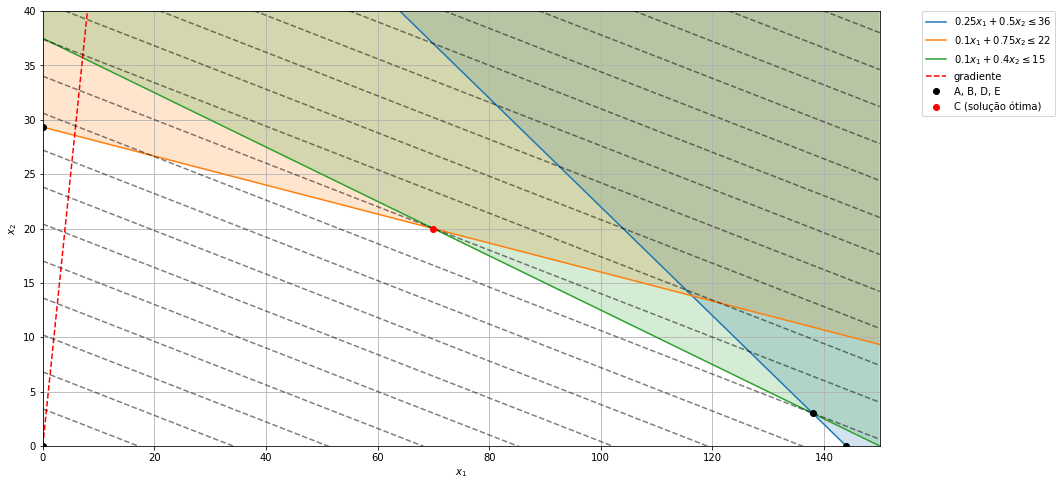

In [4]:
# Plota o gráfico com os vértices:
plotar(A, b, c, sense)
plt.plot(0,0,'ro', color="black", label="A, B, D, E") 
plt.plot(70,20,'ro', color="red", label="C (solução ótima)") 
plt.plot(0,29.33,'ro', color="black") 
plt.plot(138,3,'ro', color="black") 
plt.plot(144,0,'ro', color="black")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Cálculos

#### Gradiente

$\nabla z = (12;60)$

#### Vértices

<b>A:</b>

$x_1 = 0, x_2 = 0$

<br>

<b>B:</b>

$
    \begin{cases}
      x_1 = 0 \\
      0,1x_1 + 0,75x_2 = 22
    \end{cases}
$

$x_1 = 0, x_2 = 29,33$

<br>

<b>C:</b>

$
    \begin{cases}
      0,1x_1 + 0,75x_2 = 22 \\
      0,1x_1 + 0,4x_2 = 15
    \end{cases}
$

$x_1 = 70, x_2 = 20$

<br>

<b>D:</b>

$
    \begin{cases}
      0,1x_1 + 0,4x_2 = 15 \\
      0,25x_1 + 0,5x_2 = 36
    \end{cases}
$

$x_1 = 138, x_2 = 3$

<br>

<b>E:</b>

$
    \begin{cases}
      0,25x_1 + 0,5x_2 = 36 \\
      x_2 = 0
    \end{cases}
$

$x_1 = 144, x_2 = 0$


#### Soluções por vértice:

$z_a = 0$

$z_b = 1759,8$

$z_c = 2040$

$z_d = 1836$

$z_e = 1728$


#### Solução ótima:

$x_1 = 70, x_2 = 20$

$z^\text{*} = \text{R\$ } 2040,00$

## 1.3 Discussão

Através da resolução pelo método gráfico e analítico constatou-se que a aplicação didática, apresentada no item 1.2, é um problema de **maximização com solução única**. A constatação se deve ao fato da curva de nível que intercepta o vértice $C$ não é paralela a nenhuma das restrições que limitam a região factível. Aproveitando o raciocínio, para transformar o problema original em um problema de **maximização com múltiplas soluções**, basta alterar uma das retrições que formam o vértice $C$, de modo que fique paralela à curva de nível que intercepta o vértice $C$. Por exemplo:

* Dado o vetor gradiente $\nabla z = (12;60)$, encontra-se a reta $x_2 = 5x_1$

* Dada a reta $x_2 = 5x_1$, encontra-se a reta ortogonal $x_2 = -0,2x_1$

* Dada a reta ortogonal $x_2 = -0,2x_1$, encontra-se a reta ortogonal que intercepta o vértice $C$: $x_2 = -0,2x_1+34$

Logo, ao substituir a restrição $0,1x_1 + 0,75x_2 \leq 22$ por $0,2x_1 + x_2 \leq 34$, o problema passa a ter múltiplas soluções, conforme observa-se no gráfico abaixo:

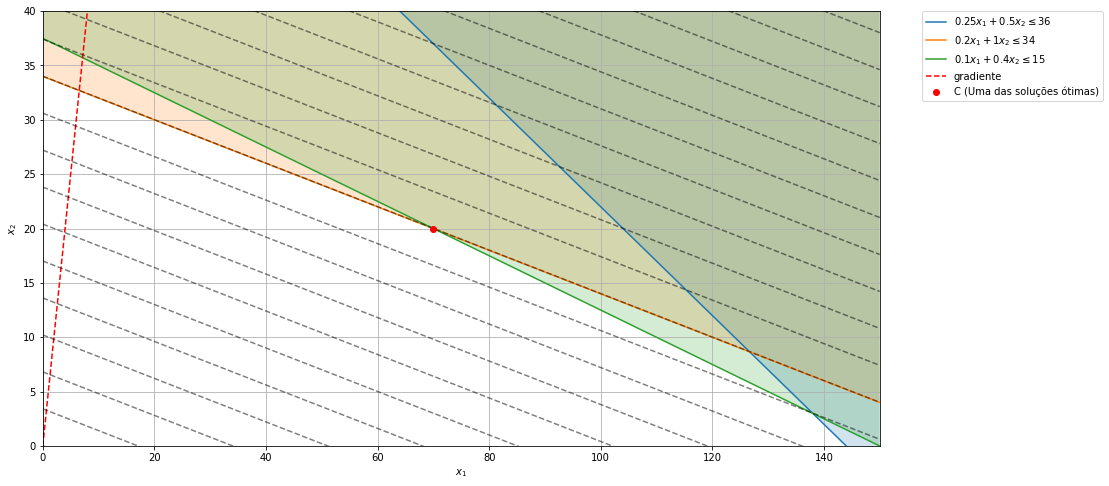

In [5]:
A = [[0.25, 0.5], 
     [0.2, 1], 
     [0.1, 0.4]]

b = [36, 34, 15] 

plotar(A, b, c, sense)
plt.plot(70,20,'ro', color="red", label="C (Uma das soluções ótimas)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Para transformar o problema original em um problema com **solução infinita**, basta alterar as inequações das restrições para $\geq$, mantendo o objetivo de maximização. Deste modo, a região factível torna-se infinita no sentido do crescimento do gradiente, como pode-se observar:

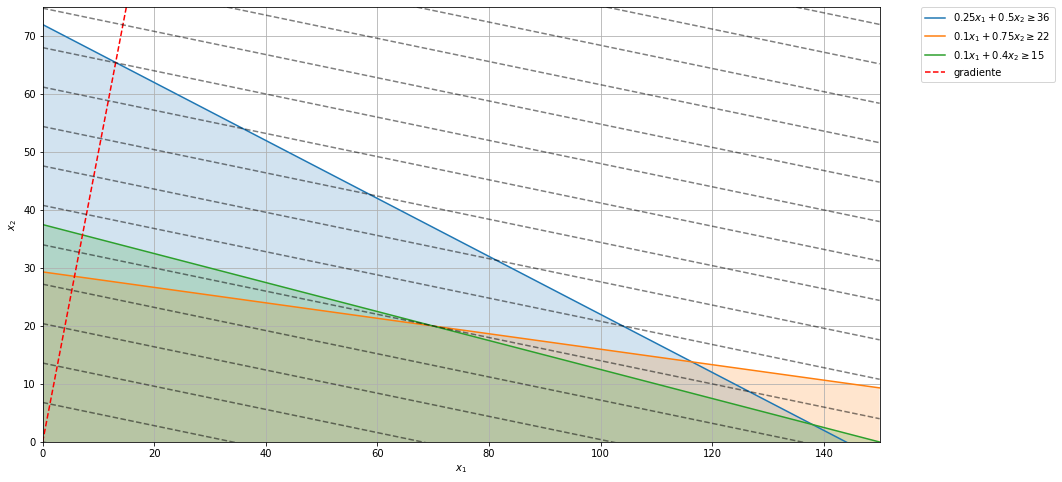

In [6]:
A = [[0.25, 0.5], 
     [0.1, 0.75], 
     [0.1, 0.4]]

b = [36, 22, 15]

c = [12, 60]

sense = ['>=', '>=', '>=']

plotar(A, b, c, sense, max_y=75, z_max=10000, z_step=408)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Para transformar o problema original em uma problema com **solução infactível**, basta alterar a restrição $0,1x_1 + 0,75x_2 \leq 22$ para $0,1x_1 + 0,4x_2 \geq 15$. Deste modo, como pode-se observar no gráfico abaixo, todas as regiões tornam-se restritas.

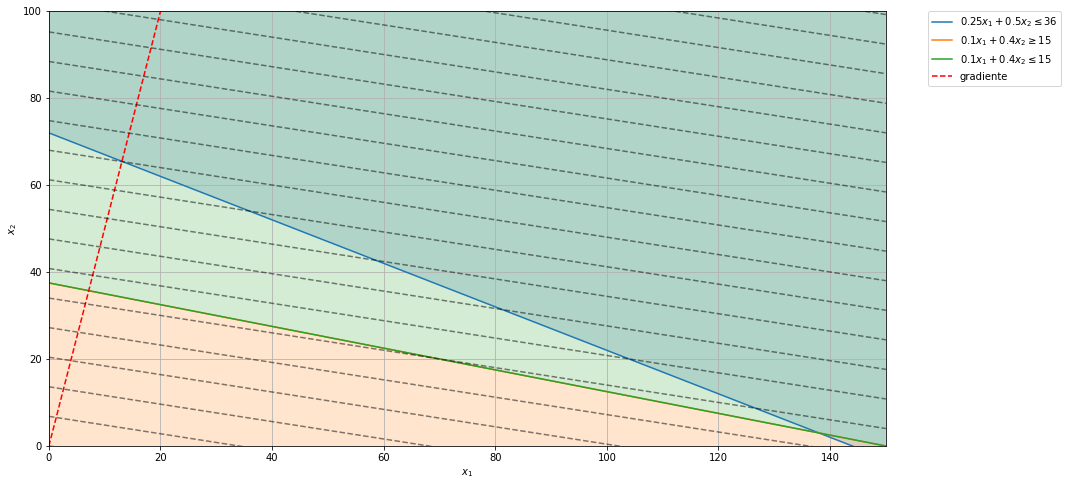

In [7]:
A = [[0.25, 0.5], 
     [0.1, 0.4], 
     [0.1, 0.4]]

b = [36, 15, 15]

c = [12, 60]

sense = ['<=', '>=', '<=']

plotar(A, b, c, sense, max_y=100, z_max=10000, z_step=408)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Ao inverter o sentido das inequações das restrições do problema original, considerando o objetivo de minimização, obtém-se um problema **minimização com solução única**, dado que nenhuma das restrições são paralelas às curvas de nível.

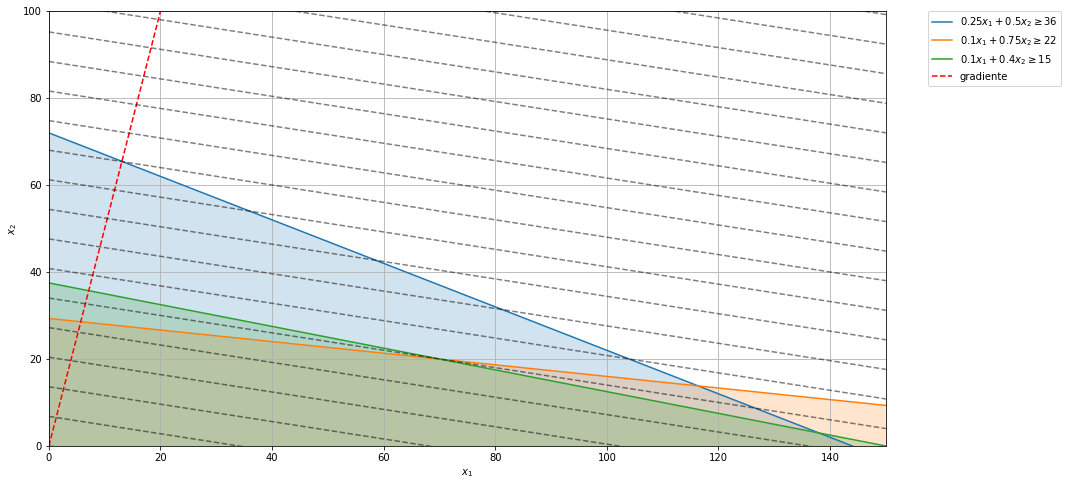

In [8]:
A = [[0.25, 0.5], 
     [0.1, 0.75], 
     [0.1, 0.4]]

b = [36, 22, 15]

c = [12, 60]

sense = ['>=', '>=', '>=']

plotar(A, b, c, sense, max_y=100, z_max=10000, z_step=408)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Para transformar o problema anterior em um problema de **minimização com múltiplas soluções**, basta alterar uma das restrições que delimitam a região viável para que fique paralela com a curva de nível. Exemplo:

* Dado o vetor gradiente $\nabla z = (12;60)$, encontra-se a reta $x_2 = 5x_1$

* Dada a reta $x_2 = 5x_1$, encontra-se a reta ortogonal $x_2 = -0,2x_1$

* Dada a reta ortogonal $x_2 = -0,2x_1$, encontra-se uma reta ortogonal que delimita a região viável $C$: $x_2 = -0,2x_1+41$

Logo, ao substituir a restrição $0,25x_1 + 0,5x_2 \geq 36$ por $0,2x_1 + x_2 \geq 41$, o problema passa a ter múltiplas soluções, conforme observa-se no gráfico abaixo:

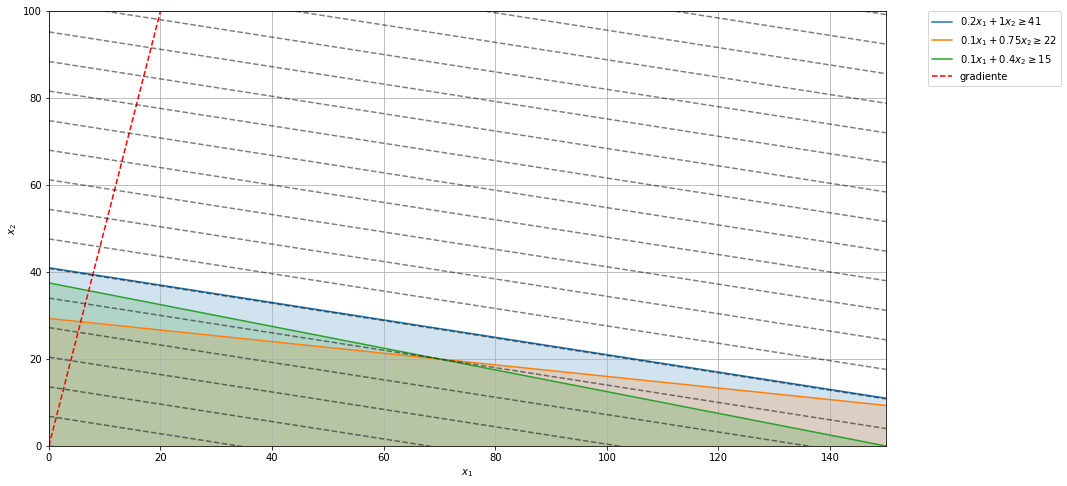

In [9]:
A = [[0.2, 1], 
     [0.1, 0.75], 
     [0.1, 0.4]]

b = [41, 22, 15]

c = [12, 60]

sense = ['>=', '>=', '>=']

plotar(A, b, c, sense, max_y=100, z_max=10000, z_step=408)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<hr>

# 2 Problema da Mistura

## 2.1 Modelo genérico


### Índices:

$i = 1,..,m$

$j = 1,...,n$


### Parâmetros do modelo

$a_{ij} = \text{Proporção do nutriente } i \text{ no ingrediente } j$

$b_i = \text{Proporção mínima necessária do nutriente } i \text{ para a composição da mistura}$

$c_j = \text{Custo por kg do ingrediente } j $ 


### Variáveis de decisão

$x_j = \text{quantidade em kg do ingrediente } j \text{ que deve ser utilizada em uma unidade (1kg) de ração}$


### Função objetivo

$\text{min }z = \sum\limits_{j=1}^{n} c_j x_{j}$

### Sujeito a:

$\sum\limits_{j=1}^{n} a_{ij} x_{j} \geq b_{i}, \forall \; i$

$\sum\limits_{j=1}^{n} x_{j} = 1$

$x_{j} \geq 0$

## 2.2 Aplicação didática

[Adaptado de Arenales et al., 2007] Uma agroindústria deve produzir um tipo de ração para determinado animal. Essa ração é produzida pela mistura de farinhas de dois ingredientes básicos: osso e soja. Cada um desses dois ingredientes contém diferentes quantidades de dois nutrientes necessários a uma dieta nutricional balanceada: proteína e cálcio. O nutricionista especifica as necessidades mínimas desses nutrientes em 1kg de ração. Cada ingrediente é adquirido no mercado com um certo custo unitário ($\text{R\$}$/kg). Os dados do problema são apresentados na tabela abaixo. Por exemplo, a farinha de osso é constituída de 20\% de proteína e 60\% de cálcio; a ração deve ser composta de pelo menos 30\% de proteína e 50\% de cálcio; 1kg da farinha de osso custa $\text{R\$}$ 0,56 (os ingredientes podem ser constituídos por outros elementos, mas que não são importantes para o problema em questão). Deve-se determinar em que quantidades os ingredientes devem ser misturados de modo a produzir uma ração que satisfaça às restrições nutricionais com o mínimo custo.


| Nutrientes | Osso | Peixe | Proporção |
| --- | --- | --- | --- |
| Proteína | 0,2 | 0,4 | 0,3 |
| Cálcio | 0,6 | 0,4 | 0,5 |
| Custos ($\text{R\$}$/kg) | 0,56 | 0,46 |  |

### Código para gerar a visualização

In [ ]:
# Limites dos eixos:
max_x = 1
max_y = 1

# Vetor de valores para a variável x1:
x1 = np.linspace(0, max_x, 500)

# Restrições transformadas em igualdade com x2 isolado:
# Restrição 1:
x2_1 = (0.3 - 0.2*x1) / 0.4

# Restrição 2:
x2_2 = (0.5 - 0.6*x1) / 0.4

# Restrição 3:
x2_3 = 1 - x1

# Variável auxiliar para o gráfico:
y_inf = x1*0 + 1000

# Plota as retas das restrições:
plt.plot(x1, x2_1, label=r'$0.2x_1 + 0.4x_2 \geq 0.3$')
plt.plot(x1, x2_2, label=r'$0.6x_1 + 0.4x_2 \geq 0.5$')
plt.plot(x1, x2_3, label=r'$x_1 + x_2 = 1$')

# Preenche a região infactível:
plt.fill_between(x1, x2_1, facecolor='#1f77b4', alpha=0.2)
plt.fill_between(x1, x2_2, facecolor='#ff7f0e', alpha=0.2)

# Plota o vetor gradiente:
gradiente = (0.56, 0.46) 

a,b = get_coefs_reta(gradiente[0], gradiente[1])
y_grad = a*x1 + b
plt.plot(x1, y_grad, color='red', label='gradiente', linestyle='--')


# Plota as curvas de nível:
for z in np.arange(0.102, 2, 0.102):
    x, y, x0, y0 = get_coords_curva_nivel(z, gradiente)
    a,b = get_coefs_reta(x0, y0, x, y)
    y_level = a*x1 + b
    plt.plot(x1, y_level, color='black', linestyle='--', alpha=0.5)

# Limita os eixos:
plt.xlim((0, max_x))
plt.ylim((0, max_y))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Plota o vértice que maximiza z:
plt.plot(0.5,0.5,'ro', color="red", label="A (solução ótima)") 
 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

### Cálculos

#### Gradiente

$\nabla z = (0,56;0,46)$

#### Vértice

<b>A:</b>

$
    \begin{cases}
      0,2x_1 + 0,4x_2 = 0,3 \\
      0,6x_1 + 0,4x_2 = 0,5 \\
      x_1 + x_2 = 1
    \end{cases}
$

$x_1 = 0.5, x_2 = 0.5$



#### Solução ótima:

$x_1 = 0,5, x_2 = 0,5$

$z^\text{*} = \text{R\$ } 0.51$

<hr>

# 3 Problema do Transporte

## 3.1 Modelo genérico


### Índices:

$i = 1,..,m$

$j = 1,...,n$


### Parâmetros do modelo

$c_{ij} = \text{Custo unitário do transporte fornecedor } i \text{ para o consumidor } j$

$a_i = \text{Capacidade de abastecimento do fornecedor } i$

$b_j = \text{Demanda do consumidor } j$
 


### Variáveis de decisão

$x_{ij} = \text{quantidades transportadas do fornecedor } i \text{ para o consumidor }j$


### Função objetivo

$\text{min }z = \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{n} c_{ij} x_{j}$

### Sujeito a:

$\sum\limits_{j=1}^{n} x_{ij} \leq a_{i}, \forall \; i$

$\sum\limits_{i=1}^{m} x_{ij} \geq b_{j}, \forall \; j$

$x_{ij} \geq 0$

## 3.2 Aplicação didática

[Adaptado de Belfiore e Fávero, 2013] A Karpet Ltda é uma empresa fabricante de autopeças, cujas sedes estão localizadas em Osasco e São Sebastião. Seus clientes encontram-se em São Paulo e Rio de Janeiro. Os custos unitários de transporte de cada origem para cada destino, assim como a capacidade de cada fornecedor e a demanda de cada cliente, encontram-se na tabela abaixo. O objetivo é atender a demanda de cada consumidor final, respeitando as capacidades de fornecimento, de forma a minimizar o custo total de transporte. Modelar o problema de transporte.

| Origem | São Paulo | Rio de Janeiro |  Capacidade |
| --- | --- | --- | --- | 
| Osasco | 12 | 24 | 190 |
| São Sebastião | 21 | 14 | 110 |
| Demanda | 120 | 160 | 

### Forma padrão

#### Variáveis de decisão

$x_1 = \text{quantidade transportada do fornecedor 1 para o consimidor 1}$

$x_2 = \text{quantidade transportada do fornecedor 1 para o consimidor 2}$

$x_3 = \text{quantidade transportada do fornecedor 2 para o consimidor 1}$

$x_4 = \text{quantidade transportada do fornecedor 2 para o consimidor 2}$

#### Função objetivo

$\text{max }-z = -12x_{1} - 24x_{2} - 21x_{3} - 14x_{4}$

#### Sujeito a

$x_{1} + x_{2} + x_5 = 190$

$x_{3} + x_{4} + x_6 = 110$

$x_{1} + x_{3} - x_7 = 120$

$x_{2} + x_{4} - x_8 = 160$

$x_1, x_2, x_3, x_4 \geq 0$

In [ ]:
# Solução:
# x11 = 120
# x12 = 50
# x13 = 0
# x14 = 110